# Assignment 3 - Credit Risk Scoring

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# Basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preporcessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Balancing
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Models
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

<IPython.core.display.Javascript object>

In [3]:
data = pd.read_csv("01_Data/credit_train.csv")
data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


<IPython.core.display.Javascript object>

In [4]:
data.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


<IPython.core.display.Javascript object>

# Data Preprocessing

## Missing Values

In [5]:
data.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

<IPython.core.display.Javascript object>

In [6]:
# Check number of missings for all variables
variables = [
    "Loan ID",
    "Customer ID",
    "Loan Status",
    "Current Loan Amount",
    "Term",
    "Credit Score",
    "Annual Income",
    "Years in current job",
    "Home Ownership",
    "Purpose",
    "Monthly Debt",
    "Years of Credit History",
    "Months since last delinquent",
    "Number of Open Accounts",
    "Number of Credit Problems",
    "Current Credit Balance",
    "Maximum Open Credit",
    "Bankruptcies",
    "Tax Liens",
]
for i in variables:
    print("There are ", data[i].isna().sum(), "null values for " + i)

There are  514 null values for Loan ID
There are  514 null values for Customer ID
There are  514 null values for Loan Status
There are  514 null values for Current Loan Amount
There are  514 null values for Term
There are  19668 null values for Credit Score
There are  19668 null values for Annual Income
There are  4736 null values for Years in current job
There are  514 null values for Home Ownership
There are  514 null values for Purpose
There are  514 null values for Monthly Debt
There are  514 null values for Years of Credit History
There are  53655 null values for Months since last delinquent
There are  514 null values for Number of Open Accounts
There are  514 null values for Number of Credit Problems
There are  514 null values for Current Credit Balance
There are  516 null values for Maximum Open Credit
There are  718 null values for Bankruptcies
There are  524 null values for Tax Liens


<IPython.core.display.Javascript object>

There are many missing values for Credit Score, Annual Income and Months since last delinquency. The following missing tratments are applied: <br>
- impute the missing annual income with the mean <br> 
- impute the missing values for credit score with 2 different means based on short and long-term debt <br> 
- drop Months since last delinquency as it is used for calculating other key variables
- drop missing observations for the other variables

In [7]:
# Remove missing values for target variable
data.dropna(subset=["Loan Status"], inplace=True)

<IPython.core.display.Javascript object>

In [8]:
# Impute missing values for annual income with the mean
data["Annual Income"].fillna(data["Annual Income"].mean(), inplace=True)

<IPython.core.display.Javascript object>

In [9]:
# Rescale credit scores above 850
data["Credit Score"] = data["Credit Score"].apply(
    lambda val: (val / 10) if val > 850 else val
)

<IPython.core.display.Javascript object>

In [10]:
# Impute missing values for credit score and annual income with 2 different means based on short and long-term debt
cscoredf = data[data["Term"] == "Short Term"]
stermAVG = cscoredf["Credit Score"].mean()
print(stermAVG)
lscoredf = data[data["Term"] == "Long Term"]
ltermAVG = lscoredf["Credit Score"].mean()
print(ltermAVG)
data.loc[(data.Term == 0) & (data["Credit Score"].isnull()), "Credit Score"] = stermAVG
data.loc[(data.Term == 1) & (data["Credit Score"].isnull()), "Credit Score"] = ltermAVG

724.6209386906824
695.483727170432


<IPython.core.display.Javascript object>

In [11]:
# Create default flag
data["default"] = data["Loan Status"].apply(lambda x: 0 if x == "Fully Paid" else 1)

<IPython.core.display.Javascript object>

In [12]:
# Remove fields that are not needed
data.drop(
    labels=["Loan ID", "Customer ID", "Loan Status", "Months since last delinquent",],
    axis=1,
    inplace=True,
)

<IPython.core.display.Javascript object>

In [13]:
data.columns

Index(['Current Loan Amount', 'Term', 'Credit Score', 'Annual Income',
       'Years in current job', 'Home Ownership', 'Purpose', 'Monthly Debt',
       'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'default'],
      dtype='object')

<IPython.core.display.Javascript object>

In [14]:
print(
    "There are",
    len(data),
    "observations before applying treatment for missing values.",
)

data_dropna = data.dropna()
print(
    "There are",
    len(data_dropna),
    "observations after applying treatment for missing values.",
)

There are 100000 observations before applying treatment for missing values.
There are 77271 observations after applying treatment for missing values.


<IPython.core.display.Javascript object>

## Correlations

In [15]:
# Find all correlations and sort
correlations_data = data.corr()["Credit Score"].sort_values(ascending=False)

# Print the correlations
print(correlations_data.tail)

<bound method NDFrame.tail of Credit Score                 1.000000
Current Loan Amount          0.134951
Years of Credit History      0.077718
Maximum Open Credit          0.017392
Annual Income               -0.005092
Current Credit Balance      -0.015964
Tax Liens                   -0.020593
Number of Open Accounts     -0.030063
Bankruptcies                -0.034479
Number of Credit Problems   -0.047260
Monthly Debt                -0.091347
default                     -0.108485
Name: Credit Score, dtype: float64>


<IPython.core.display.Javascript object>

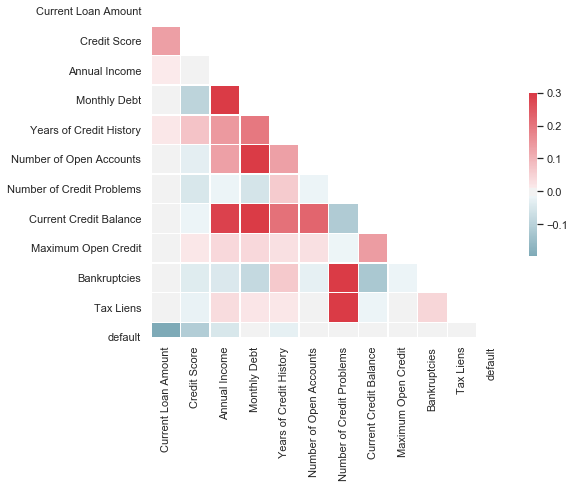

<IPython.core.display.Javascript object>

In [16]:
import seaborn as sns

sns.set(style="white")

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)

## Univariate Analysis

1. Fine and coarse classing <br>
2. Check if the explanatory variables have reasonable trends <br>

#### Target Variable - Default flag

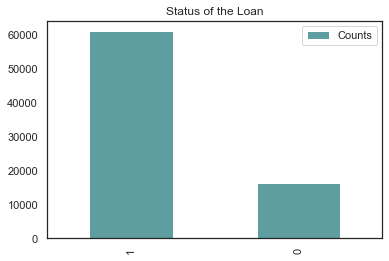

<IPython.core.display.Javascript object>

In [17]:
coffvalue = data_dropna[data_dropna["default"] == 0]["default"].count()
fpaidvalue = data_dropna[data_dropna["default"] == 1]["default"].count()
data_plot = {"Counts": [coffvalue, fpaidvalue]}
statusDF = pd.DataFrame(data_plot, index=[1, 0])
# statusDF.head()
statusDF.plot(kind="bar", color="cadetblue", title="Status of the Loan")

In [18]:
performing = data_dropna[data_dropna["default"] == 0]["default"].count()
defaults = data_dropna[data_dropna["default"] == 1]["default"].count()

count_defaults = {"Count default": [performing, defaults]}
count_defaults_df = pd.DataFrame(count_defaults, index=["Performing", "Default"])
count_defaults_df.head()

,Count default
Performing,61057
Default,16214


<IPython.core.display.Javascript object>

#### Credit Score

In [19]:
data_dropna["Credit Score"] = data_dropna["Credit Score"].apply(
    lambda val: "Poor" if np.isreal(val) and val < 580 else val
)
data_dropna["Credit Score"] = data_dropna["Credit Score"].apply(
    lambda val: "Average" if np.isreal(val) and (val >= 580 and val < 670) else val
)
data_dropna["Credit Score"] = data_dropna["Credit Score"].apply(
    lambda val: "Good" if np.isreal(val) and (val >= 670 and val < 740) else val
)
data_dropna["Credit Score"] = data_dropna["Credit Score"].apply(
    lambda val: "Very Good" if np.isreal(val) and (val >= 740 and val < 800) else val
)
data_dropna["Credit Score"] = data_dropna["Credit Score"].apply(
    lambda val: "Exceptional" if np.isreal(val) and (val >= 800 and val <= 850) else val
)

C:\Users\Asus\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Asus\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Asus\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

<IPython.core.display.Javascript object>

In [20]:
pd.crosstab(data_dropna["Credit Score"], data_dropna["default"])

default,0,1
Credit Score,,
Average,3861,1907
Good,41930,11908
Very Good,15266,2399


<IPython.core.display.Javascript object>

In [21]:
pd.crosstab(data_dropna["Credit Score"], data_dropna["default"]).apply(
    lambda r: r / r.sum(), axis=1
)

default,0,1
Credit Score,,
Average,0.669383,0.330617
Good,0.778818,0.221182
Very Good,0.864195,0.135805


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Proportion of Defaults')

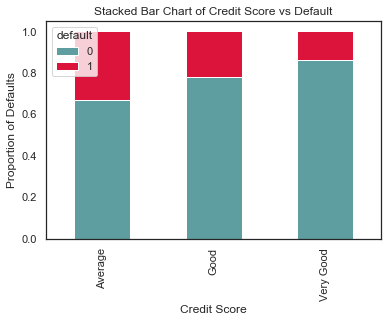

<IPython.core.display.Javascript object>

In [22]:
table = pd.crosstab(data_dropna["Credit Score"], data_dropna["default"])
table.div(table.sum(1).astype(float), axis=0).plot(
    kind="bar", color=["cadetblue", "crimson"], stacked=True
)
plt.title("Stacked Bar Chart of Credit Score vs Default")
plt.xlabel("Credit Score")
plt.ylabel("Proportion of Defaults")

#### Current Loan Amount

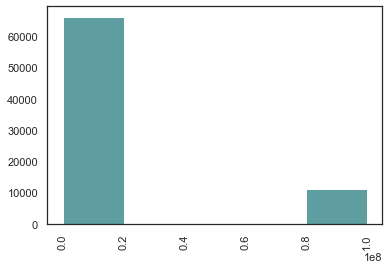

<IPython.core.display.Javascript object>

In [23]:
plt.hist(data_dropna["Current Loan Amount"], bins=5, color="cadetblue")
plt.xticks(rotation="vertical")
plt.show()

In [24]:
data_dropna["Current Loan Amount"] = data_dropna["Current Loan Amount"].apply(
    lambda val: "LoanAmount 1: <=100 000" if np.isreal(val) and val <= 100000 else val
)
data_dropna["Current Loan Amount"] = data_dropna["Current Loan Amount"].apply(
    lambda val: "LoanAmount 2: >100 000 and <=200 000 "
    if np.isreal(val) and val > 100000 and val <= 200000
    else val
)
data_dropna["Current Loan Amount"] = data_dropna["Current Loan Amount"].apply(
    lambda val: "LoanAmount 3: >200 000 and <=300 000 "
    if np.isreal(val) and val > 200000 and val <= 300000
    else val
)
data_dropna["Current Loan Amount"] = data_dropna["Current Loan Amount"].apply(
    lambda val: "LoanAmount 3: >300 000 and <=400 000 "
    if np.isreal(val) and val > 300000 and val <= 400000
    else val
)
data_dropna["Current Loan Amount"] = data_dropna["Current Loan Amount"].apply(
    lambda val: "LoanAmount 4: >400 000 and <=500 000 "
    if np.isreal(val) and val > 400000 and val <= 500000
    else val
)
data_dropna["Current Loan Amount"] = data_dropna["Current Loan Amount"].apply(
    lambda val: "LoanAmount 5: >500 000 " if np.isreal(val) and val > 500000 else val
)

C:\Users\Asus\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Asus\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Asus\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

<IPython.core.display.Javascript object>

#### Annual Income --> Debt to Income

In [25]:
data_dropna["Monthly Income"] = data_dropna["Annual Income"] / 12
data_dropna["Debt to Income"] = (
    data_dropna["Monthly Debt"] / data_dropna["Monthly Income"]
)

C:\Users\Asus\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Asus\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>

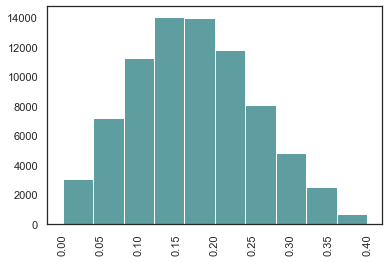

<IPython.core.display.Javascript object>

In [26]:
plt.hist(data_dropna["Debt to Income"], bins=10, color="cadetblue")
plt.xticks(rotation="vertical")
plt.show()

In [27]:
data_dropna["Debt to Income v2"] = data_dropna["Debt to Income"].apply(
    lambda x: "DTI 1: <15%" if x < 0.15 else ("DTI 2: =>15%")
)

C:\Users\Asus\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<IPython.core.display.Javascript object>

In [28]:
pd.crosstab(data_dropna["Debt to Income v2"], data_dropna["default"])

default,0,1
Debt to Income v2,,
DTI 1: <15%,26551,5474
DTI 2: =>15%,34506,10740


<IPython.core.display.Javascript object>

In [29]:
pd.crosstab(data_dropna["Debt to Income v2"], data_dropna["default"]).apply(
    lambda r: r / r.sum(), axis=1
)

default,0,1
Debt to Income v2,,
DTI 1: <15%,0.829071,0.170929
DTI 2: =>15%,0.762631,0.237369


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Proportion of Defaults')

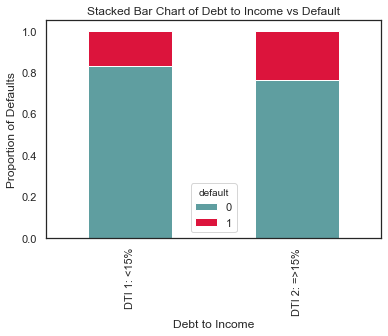

<IPython.core.display.Javascript object>

In [30]:
%matplotlib inline
table = pd.crosstab(data_dropna["Debt to Income v2"], data_dropna["default"])
table.div(table.sum(1).astype(float), axis=0).plot(
    kind="bar", color=["cadetblue", "crimson"], stacked=True
)
plt.title("Stacked Bar Chart of Debt to Income vs Default")
plt.xlabel("Debt to Income")
plt.ylabel("Proportion of Defaults")

#### Years in Current Job - Tried different versions of bucketing, but it does not show good discriminatory power

In [31]:
data_dropna["Years in current job"] = data_dropna["Years in current job"].str.extract(
    r"(\d+)"
)
data_dropna["Years in current job"] = data_dropna["Years in current job"].astype(float)

C:\Users\Asus\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Asus\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>

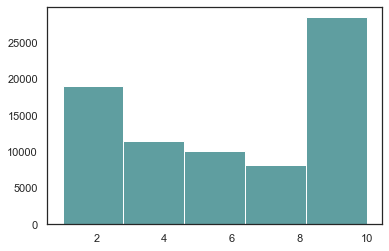

<IPython.core.display.Javascript object>

In [32]:
plt.hist(data_dropna["Years in current job"], bins=5, color="cadetblue")
plt.show()

In [33]:
data_dropna["Employment History"] = data_dropna["Years in current job"].apply(
    lambda x: "Job 1: <=1years" if x <= 1 else ("Job 2: >1 years")
)

C:\Users\Asus\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<IPython.core.display.Javascript object>

In [34]:
pd.crosstab(data_dropna["Employment History"], data_dropna["default"])

default,0,1
Employment History,,
Job 1: <=1years,9132,2552
Job 2: >1 years,51925,13662


<IPython.core.display.Javascript object>

In [35]:
pd.crosstab(data_dropna["Employment History"], data_dropna["default"]).apply(
    lambda r: r / r.sum(), axis=1
)

default,0,1
Employment History,,
Job 1: <=1years,0.781582,0.218418
Job 2: >1 years,0.791697,0.208303


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Proportion of Defaults')

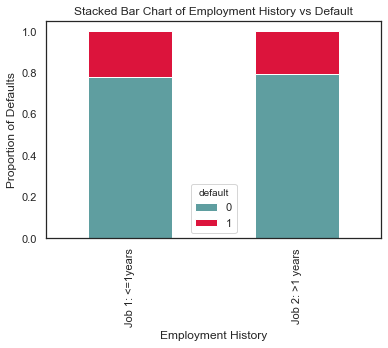

<IPython.core.display.Javascript object>

In [36]:
%matplotlib inline
table = pd.crosstab(data_dropna["Employment History"], data_dropna["default"])
table.div(table.sum(1).astype(float), axis=0).plot(
    kind="bar", color=["cadetblue", "crimson"], stacked=True
)
plt.title("Stacked Bar Chart of Employment History vs Default")
plt.xlabel("Employment History")
plt.ylabel("Proportion of Defaults")

#### Years of credit history

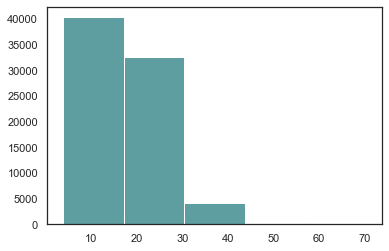

<IPython.core.display.Javascript object>

In [37]:
plt.hist(data_dropna["Years of Credit History"], bins=5, color="cadetblue")
plt.show()

In [90]:
data_dropna["Years of Credit History2"] = data_dropna["Years of Credit History"].apply(
    lambda x: "CrHistory 1: <20" if x < 20 else ("CrHistory 2: >=20")
)

C:\Users\Asus\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<IPython.core.display.Javascript object>

In [91]:
pd.crosstab(data_dropna["Years of Credit History2"], data_dropna["default"])

default,0,1
Years of Credit History2,,
CrHistory 1: <20,41230,11416
CrHistory 2: >=20,19827,4798


<IPython.core.display.Javascript object>

In [92]:
pd.crosstab(data_dropna["Years of Credit History2"], data_dropna["default"]).apply(
    lambda r: r / r.sum(), axis=1
)

default,0,1
Years of Credit History2,,
CrHistory 1: <20,0.783155,0.216845
CrHistory 2: >=20,0.805157,0.194843


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Proportion of Defaults')

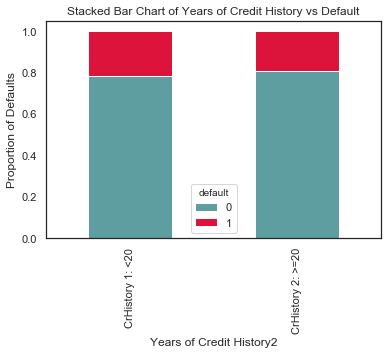

<IPython.core.display.Javascript object>

In [93]:
%matplotlib inline
table = pd.crosstab(data_dropna["Years of Credit History2"], data_dropna["default"])
table.div(table.sum(1).astype(float), axis=0).plot(
    kind="bar", color=["cadetblue", "crimson"], stacked=True
)
plt.title("Stacked Bar Chart of Years of Credit History vs Default")
plt.xlabel("Years of Credit History2")
plt.ylabel("Proportion of Defaults")

#### Number of credit problems - Tried different versions of bucketing, but it does not show good discriminatory power

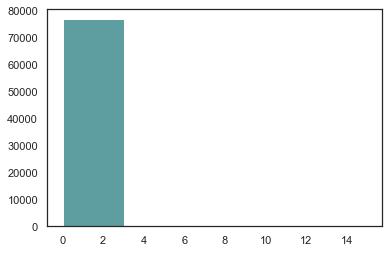

<IPython.core.display.Javascript object>

In [94]:
plt.hist(data_dropna["Number of Credit Problems"], bins=5, color="cadetblue")
plt.show()

In [95]:
data_dropna["Number of Credit Problems2"] = data_dropna[
    "Number of Credit Problems"
].apply(lambda x: "CrProblems 1: 0" if x == 0 else ("CrProblems 2: >0"))

C:\Users\Asus\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>

In [96]:
pd.crosstab(data_dropna["Number of Credit Problems2"], data_dropna["default"])

default,0,1
Number of Credit Problems2,,
CrProblems 1: 0,52667,14061
CrProblems 2: >0,8390,2153


<IPython.core.display.Javascript object>

In [97]:
pd.crosstab(data_dropna["Number of Credit Problems2"], data_dropna["default"]).apply(
    lambda r: r / r.sum(), axis=1
)

default,0,1
Number of Credit Problems2,,
CrProblems 1: 0,0.789279,0.210721
CrProblems 2: >0,0.795789,0.204211


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Proportion of Defaults')

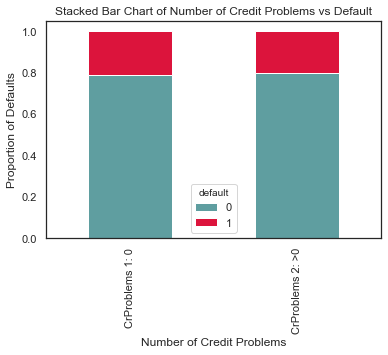

<IPython.core.display.Javascript object>

In [98]:
%matplotlib inline
table = pd.crosstab(data_dropna["Number of Credit Problems2"], data_dropna["default"])
table.div(table.sum(1).astype(float), axis=0).plot(
    kind="bar", color=["cadetblue", "crimson"], stacked=True
)
plt.title("Stacked Bar Chart of Number of Credit Problems vs Default")
plt.xlabel("Number of Credit Problems")
plt.ylabel("Proportion of Defaults")

#### Number of open accounts - Tried different versions of bucketing, but it does not show good discriminatory power

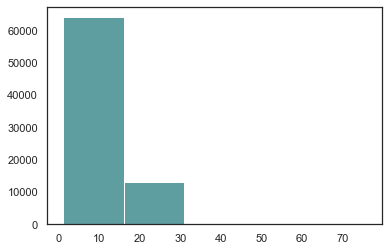

<IPython.core.display.Javascript object>

In [99]:
plt.hist(data_dropna["Number of Open Accounts"], bins=5, color="cadetblue")
plt.show()

In [100]:
data_dropna["Number of Open Accounts2"] = data_dropna["Number of Open Accounts"].apply(
    lambda x: "OpenAcc 1: <10"
    if x <= 10
    else ("OpenAcc 2: 10-20" if x > 10 and x < 20 else "OpenAcc 3: >=20")
)

C:\Users\Asus\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<IPython.core.display.Javascript object>

In [101]:
pd.crosstab(data_dropna["Number of Open Accounts2"], data_dropna["default"])

default,0,1
Number of Open Accounts2,,
OpenAcc 1: <10,31176,8088
OpenAcc 2: 10-20,25993,7004
OpenAcc 3: >=20,3888,1122


<IPython.core.display.Javascript object>

In [102]:
pd.crosstab(data_dropna["Number of Open Accounts2"], data_dropna["default"]).apply(
    lambda r: r / r.sum(), axis=1
)

default,0,1
Number of Open Accounts2,,
OpenAcc 1: <10,0.794010,0.205990
OpenAcc 2: 10-20,0.787738,0.212262
OpenAcc 3: >=20,0.776048,0.223952


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Proportion of Defaults')

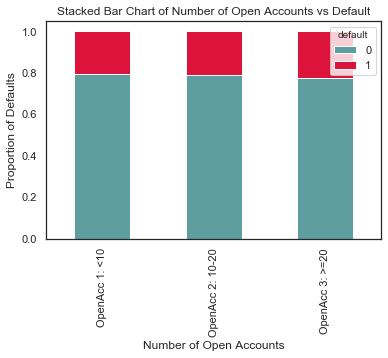

<IPython.core.display.Javascript object>

In [103]:
%matplotlib inline
table = pd.crosstab(data_dropna["Number of Open Accounts2"], data_dropna["default"])
table.div(table.sum(1).astype(float), axis=0).plot(
    kind="bar", color=["cadetblue", "crimson"], stacked=True
)
plt.title("Stacked Bar Chart of Number of Open Accounts vs Default")
plt.xlabel("Number of Open Accounts")
plt.ylabel("Proportion of Defaults")

#### Bankruptcies - Tried different versions of bucketing, but it does not show good discriminatory power

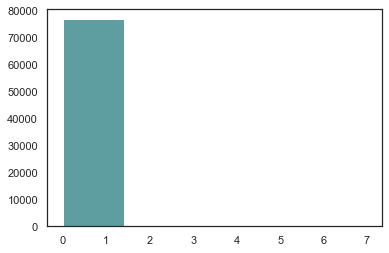

<IPython.core.display.Javascript object>

In [104]:
plt.hist(data_dropna["Bankruptcies"], bins=5, color="cadetblue")
plt.show()

In [105]:
data_dropna["Bankruptcies2"] = data_dropna["Bankruptcies"].apply(
    lambda x: "Bankruptcies 1: 0" if x == 0 else ("Bankruptcies 2: >0")
)

C:\Users\Asus\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<IPython.core.display.Javascript object>

In [106]:
pd.crosstab(data_dropna["Bankruptcies2"], data_dropna["default"])

default,0,1
Bankruptcies2,,
Bankruptcies 1: 0,54403,14584
Bankruptcies 2: >0,6654,1630


<IPython.core.display.Javascript object>

In [107]:
pd.crosstab(data_dropna["Bankruptcies2"], data_dropna["default"]).apply(
    lambda r: r / r.sum(), axis=1
)

default,0,1
Bankruptcies2,,
Bankruptcies 1: 0,0.788598,0.211402
Bankruptcies 2: >0,0.803235,0.196765


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Proportion of Defaults')

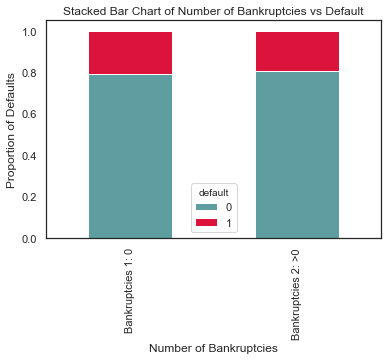

<IPython.core.display.Javascript object>

In [108]:
%matplotlib inline
table = pd.crosstab(data_dropna["Bankruptcies2"], data_dropna["default"])
table.div(table.sum(1).astype(float), axis=0).plot(
    kind="bar", color=["cadetblue", "crimson"], stacked=True
)
plt.title("Stacked Bar Chart of Number of Bankruptcies vs Default")
plt.xlabel("Number of Bankruptcies")
plt.ylabel("Proportion of Defaults")

#### Home Ownership - This Variable does not show reasonable trend as we would expect people with own home to have smallest default rate

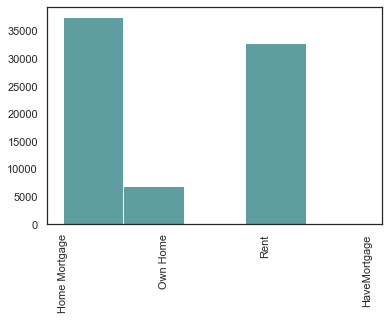

<IPython.core.display.Javascript object>

In [109]:
plt.hist(data_dropna["Home Ownership"], bins=5, color="cadetblue")
plt.xticks(rotation="vertical")
plt.show()

In [110]:
data_dropna["Home Ownership2"] = data_dropna["Home Ownership"].apply(
    lambda x: "HO 1: Own Home"
    if x == "Own Home"
    else ("HO 2: Rent" if x == "Rent" else "HO 3: Mortgage")
)

C:\Users\Asus\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<IPython.core.display.Javascript object>

In [111]:
pd.crosstab(data_dropna["Home Ownership2"], data_dropna["default"])

default,0,1
Home Ownership2,,
HO 1: Own Home,5380,1455
HO 2: Rent,25157,7609
HO 3: Mortgage,30520,7150


<IPython.core.display.Javascript object>

In [112]:
pd.crosstab(data_dropna["Home Ownership2"], data_dropna["default"]).apply(
    lambda r: r / r.sum(), axis=1
)

default,0,1
Home Ownership2,,
HO 1: Own Home,0.787125,0.212875
HO 2: Rent,0.767778,0.232222
HO 3: Mortgage,0.810194,0.189806


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Proportion of Defaults')

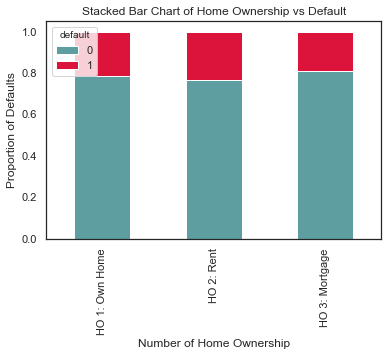

<IPython.core.display.Javascript object>

In [113]:
%matplotlib inline
table = pd.crosstab(data_dropna["Home Ownership2"], data_dropna["default"])
table.div(table.sum(1).astype(float), axis=0).plot(
    kind="bar", color=["cadetblue", "crimson"], stacked=True
)
plt.title("Stacked Bar Chart of Home Ownership vs Default")
plt.xlabel("Number of Home Ownership")
plt.ylabel("Proportion of Defaults")

#### Purpose

In [114]:
pd.crosstab(data_dropna["Purpose"], data_dropna["default"])

default,0,1
Purpose,,
Business Loan,881,352
Buy House,434,107
Buy a Car,826,151
Debt Consolidation,47821,12866
Educational Expenses,63,9
Home Improvements,3619,829
Medical Bills,663,188
Other,2101,423
Take a Trip,378,77


<IPython.core.display.Javascript object>

In [115]:
pd.crosstab(data_dropna["Purpose"], data_dropna["default"]).apply(
    lambda r: r / r.sum(), axis=1
)

default,0,1
Purpose,,
Business Loan,0.714517,0.285483
Buy House,0.802218,0.197782
Buy a Car,0.845445,0.154555
Debt Consolidation,0.787994,0.212006
Educational Expenses,0.875000,0.125000
Home Improvements,0.813624,0.186376
Medical Bills,0.779083,0.220917
Other,0.832409,0.167591
Take a Trip,0.830769,0.169231


<IPython.core.display.Javascript object>

In [116]:
data_dropna["Purpose2"] = data_dropna["Purpose"].apply(
    lambda x: "Purpose 1: Vacation"
    if (x == "vacation" or x == "Take a Trip")
    else (
        "Purpose 2: Business"
        if (x == "small_business" or x == "Business Loan")
        else (
            "Purpose 3: Debt Consolidation"
            if x == "Debt Consolidation"
            else (
                "Purpose 4: Home"
                if (x == "Buy House" or x == "Home Improvements")
                else ("Purpose 5: Car" if (x == "Buy a Car") else "Purpose 6: Other")
            )
        )
    )
)

C:\Users\Asus\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<IPython.core.display.Javascript object>

In [117]:
pd.crosstab(data_dropna["Purpose2"], data_dropna["default"]).apply(
    lambda r: r / r.sum(), axis=1
)

default,0,1
Purpose2,,
Purpose 1: Vacation,0.822519,0.177481
Purpose 2: Business,0.700274,0.299726
Purpose 3: Debt Consolidation,0.787994,0.212006
Purpose 4: Home,0.812387,0.187613
Purpose 5: Car,0.845445,0.154555
Purpose 6: Other,0.799560,0.200440


<IPython.core.display.Javascript object>

In [118]:
pd.crosstab(data_dropna["Purpose2"], data_dropna["default"])

default,0,1
Purpose2,,
Purpose 1: Vacation,431,93
Purpose 2: Business,1021,437
Purpose 3: Debt Consolidation,47821,12866
Purpose 4: Home,4053,936
Purpose 5: Car,826,151
Purpose 6: Other,6905,1731


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Proportion of Defaults')

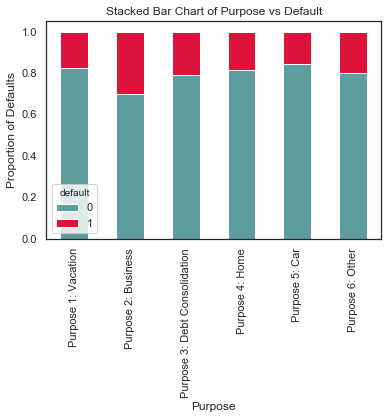

<IPython.core.display.Javascript object>

In [119]:
%matplotlib inline
table = pd.crosstab(data_dropna["Purpose2"], data_dropna["default"])
table.div(table.sum(1).astype(float), axis=0).plot(
    kind="bar", color=["cadetblue", "crimson"], stacked=True
)
plt.title("Stacked Bar Chart of Purpose vs Default")
plt.xlabel("Purpose")
plt.ylabel("Proportion of Defaults")

In [120]:
data_dropna["Purpose3"] = data_dropna["Purpose"].apply(
    lambda x: "Purpose 1: Business"
    if (x == "small_business" or x == "Business Loan")
    else ("Purpose 2: Other")
)

C:\Users\Asus\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<IPython.core.display.Javascript object>

In [121]:
pd.crosstab(data_dropna["Purpose3"], data_dropna["default"]).apply(
    lambda r: r / r.sum(), axis=1
)

default,0,1
Purpose3,,
Purpose 1: Business,0.700274,0.299726
Purpose 2: Other,0.791896,0.208104


<IPython.core.display.Javascript object>

In [122]:
pd.crosstab(data_dropna["Purpose3"], data_dropna["default"])

default,0,1
Purpose3,,
Purpose 1: Business,1021,437
Purpose 2: Other,60036,15777


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Proportion of Defaults')

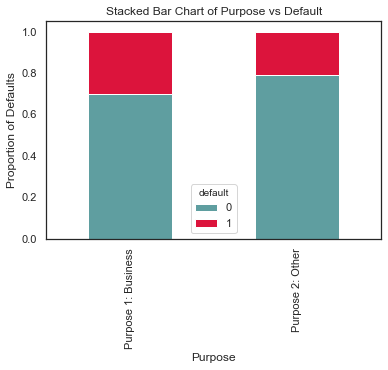

<IPython.core.display.Javascript object>

In [123]:
%matplotlib inline
table = pd.crosstab(data_dropna["Purpose3"], data_dropna["default"])
table.div(table.sum(1).astype(float), axis=0).plot(
    kind="bar", color=["cadetblue", "crimson"], stacked=True
)
plt.title("Stacked Bar Chart of Purpose vs Default")
plt.xlabel("Purpose")
plt.ylabel("Proportion of Defaults")

#### Term

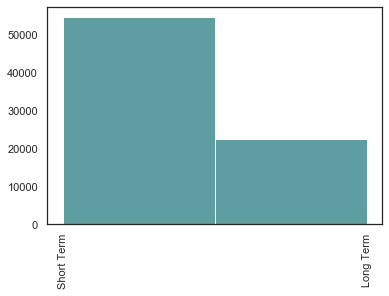

<IPython.core.display.Javascript object>

In [124]:
plt.hist(data_dropna["Term"], bins=2, color="cadetblue")
plt.xticks(rotation="vertical")
plt.show()

In [125]:
pd.crosstab(data_dropna["Term"], data_dropna["default"])

default,0,1
Term,,
Long Term,16297,6237
Short Term,44760,9977


<IPython.core.display.Javascript object>

In [126]:
pd.crosstab(data_dropna["Term"], data_dropna["default"]).apply(
    lambda r: r / r.sum(), axis=1
)

default,0,1
Term,,
Long Term,0.723218,0.276782
Short Term,0.817728,0.182272


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Proportion of Defaults')

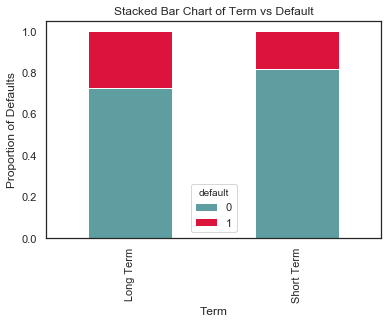

<IPython.core.display.Javascript object>

In [127]:
%matplotlib inline
table = pd.crosstab(data_dropna["Term"], data_dropna["default"])
table.div(table.sum(1).astype(float), axis=0).plot(
    kind="bar", color=["cadetblue", "crimson"], stacked=True
)
plt.title("Stacked Bar Chart of Term vs Default")
plt.xlabel("Term")
plt.ylabel("Proportion of Defaults")

#### Tax Liens

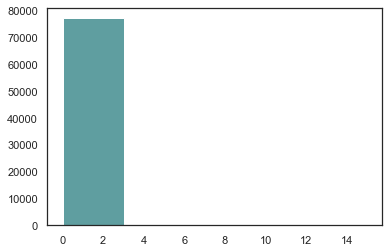

<IPython.core.display.Javascript object>

In [128]:
plt.hist(data_dropna["Tax Liens"], bins=5, color="cadetblue")
plt.show()

In [129]:
pd.crosstab(data_dropna["Tax Liens"], data_dropna["default"])

default,0,1
Tax Liens,,
0.0,59928,15877
1.0,795,221
2.0,222,67
3.0,56,23
4.0,31,14
5.0,7,6
6.0,9,2
7.0,4,3
9.0,1,1


<IPython.core.display.Javascript object>

In [130]:
data_dropna["Tax Liens2"] = data_dropna["Tax Liens"].apply(
    lambda x: "Tax Liens 1: 0" if x == 0 else "Tax Liens 2: >0"
)

C:\Users\Asus\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<IPython.core.display.Javascript object>

In [131]:
pd.crosstab(data_dropna["Tax Liens2"], data_dropna["default"])

default,0,1
Tax Liens2,,
Tax Liens 1: 0,59928,15877
Tax Liens 2: >0,1129,337


<IPython.core.display.Javascript object>

In [132]:
pd.crosstab(data_dropna["Tax Liens2"], data_dropna["default"]).apply(
    lambda r: r / r.sum(), axis=1
)

default,0,1
Tax Liens2,,
Tax Liens 1: 0,0.790555,0.209445
Tax Liens 2: >0,0.770123,0.229877


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Proportion of Defaults')

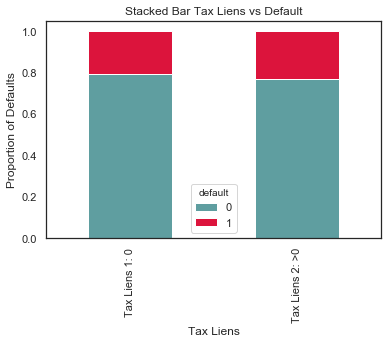

<IPython.core.display.Javascript object>

In [133]:
%matplotlib inline
table = pd.crosstab(data_dropna["Tax Liens2"], data_dropna["default"])
table.div(table.sum(1).astype(float), axis=0).plot(
    kind="bar", color=["cadetblue", "crimson"], stacked=True
)
plt.title("Stacked Bar Tax Liens vs Default")
plt.xlabel("Tax Liens")
plt.ylabel("Proportion of Defaults")

## Create Dummies

In [134]:
data_modelling = data_dropna[
    [
        "default",
        "Credit Score",
        "Debt to Income v2",
        "Years of Credit History2",
        "Purpose3",
        "Term",
        "Tax Liens2",
    ]
]

<IPython.core.display.Javascript object>

In [135]:
modelling_variables = [
    "default",
    "Credit Score",
    "Debt to Income v2",
    "Years of Credit History2",
    "Purpose3",
    "Term",
    "Tax Liens2",
]

<IPython.core.display.Javascript object>

In [136]:
for i in modelling_variables:
    if i != "default":
        data_modelling = data_modelling.join(pd.get_dummies(data_modelling[i]))
        data_modelling = data_modelling.drop([i], axis=1)

<IPython.core.display.Javascript object>

In [137]:
data_modelling.columns

Index(['default', 'Average', 'Good', 'Very Good', 'DTI 1: <15%',
       'DTI 2: =>15%', 'CrHistory 1: <20', 'CrHistory 2: >=20',
       'Purpose 1: Business', 'Purpose 2: Other', 'Long Term', 'Short Term',
       'Tax Liens 1: 0', 'Tax Liens 2: >0'],
      dtype='object')

<IPython.core.display.Javascript object>

Assign Null Groups (groups that are in the middle of the default rate trend and usually the largest population). They serve as reference and we expect change in the sign of the coefficient before and after the Null group.

In [139]:
data_modelling2 = data_modelling.drop(
    columns=[
        "Good",
        "DTI 2: =>15%",
        "CrHistory 1: <20",
        "Purpose 2: Other",
        "Tax Liens 1: 0",
        "Short Term",
    ]
)

<IPython.core.display.Javascript object>

In [140]:
data_modelling2.columns

Index(['default', 'Average', 'Very Good', 'DTI 1: <15%', 'CrHistory 2: >=20',
       'Purpose 1: Business', 'Long Term', 'Tax Liens 2: >0'],
      dtype='object')

<IPython.core.display.Javascript object>

# Modelling

## Stepwise Logistic Regression

### Model Iteration: 1

In [141]:
data_modelling3 = data_modelling2[
    [
        "default",
        "Average",
        "Very Good",
        "DTI 1: <15%",
        "CrHistory 2: >=20",
        "Purpose 1: Business",
        "Long Term",
        "Tax Liens 2: >0",
    ]
]

<IPython.core.display.Javascript object>

In [142]:
X = data_modelling3.loc[:, data_modelling3.columns != "default"]
y = data_modelling3.loc[:, data_modelling3.columns == "default"]

<IPython.core.display.Javascript object>

In [143]:
os = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

<IPython.core.display.Javascript object>

In [144]:
# Train
os_data_X, os_data_y = os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X, columns=columns)
os_data_y = pd.DataFrame(data=os_data_y, columns=["default"])
# Test
os_test_X, os_test_y = os.fit_sample(X_test, y_test)
os_test_X = pd.DataFrame(data=os_test_X, columns=columns)
os_test_y = pd.DataFrame(data=os_test_y, columns=["default"])
# we can Check the numbers of our data
print(
    "The number of observations in Development data before undersampling is ",
    len(X_train),
)
print(
    "The number of observations in Development data after undersampling is ",
    len(os_data_X),
)
print(
    "The number of observations in Validation data after undersampling is ", len(X_test)
)
print(
    "The number of observations in Validation data after undersampling is ",
    len(os_test_X),
)

The number of observations in Development data before undersampling is  54089
The number of observations in Development data after undersampling is  34014
The number of observations in Validation data after undersampling is  23182
The number of observations in Validation data after undersampling is  14628


<IPython.core.display.Javascript object>

In [145]:
logit_model = sm.Logit(os_data_y, os_data_X)
result3 = logit_model.fit()
print(result3.summary2())

Optimization terminated successfully.
         Current function value: 0.631552
         Iterations 5
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.008     
Dependent Variable:  default           AIC:               42977.2292
Date:                2020-06-01 23:48  BIC:               43036.2709
No. Observations:    34014             Log-Likelihood:    -21482.   
Df Model:            6                 LL-Null:           -21650.   
Df Residuals:        34007             LLR p-value:       7.2319e-70
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      5.0000                                         
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
Average              0.3111   0.0428   7.2780 0.0000  0.2274  0.3949
Very Good           -0.7864 

<IPython.core.display.Javascript object>

Long-term and Tax Liens are insignificant (p-value < 0.05). We will exclude variables in a step-wise way, one at a time. We start with Tax Liens as it has higher value and lowest contribution to the regression.

### Model Iteration: 2 (excl. Tax Liens)

In [146]:
data_modelling3 = data_modelling2[
    [
        "default",
        "Average",
        "Very Good",
        "DTI 1: <15%",
        "CrHistory 2: >=20",
        "Purpose 1: Business",
        "Long Term",
    ]
]

<IPython.core.display.Javascript object>

In [147]:
X = data_modelling3.loc[:, data_modelling3.columns != "default"]
y = data_modelling3.loc[:, data_modelling3.columns == "default"]

<IPython.core.display.Javascript object>

In [148]:
os = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

<IPython.core.display.Javascript object>

In [149]:
# Train
os_data_X, os_data_y = os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X, columns=columns)
os_data_y = pd.DataFrame(data=os_data_y, columns=["default"])
# Test
os_test_X, os_test_y = os.fit_sample(X_test, y_test)
os_test_X = pd.DataFrame(data=os_test_X, columns=columns)
os_test_y = pd.DataFrame(data=os_test_y, columns=["default"])

<IPython.core.display.Javascript object>

In [150]:
logit_model = sm.Logit(os_data_y, os_data_X)
result3 = logit_model.fit()
print(result3.summary2())

Optimization terminated successfully.
         Current function value: 0.631582
         Iterations 5
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.008     
Dependent Variable:  default           AIC:               42977.2736
Date:                2020-06-01 23:49  BIC:               43027.8808
No. Observations:    34014             Log-Likelihood:    -21483.   
Df Model:            5                 LL-Null:           -21650.   
Df Residuals:        34008             LLR p-value:       2.2999e-70
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      5.0000                                         
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
Average              0.3100   0.0427   7.2535 0.0000  0.2263  0.3938
Very Good           -0.7864 

<IPython.core.display.Javascript object>

### Model Iteration: 3 (excl. Term)

In [152]:
data_modelling3 = data_modelling2[
    [
        "default",
        "Average",
        "Very Good",
        "DTI 1: <15%",
        "CrHistory 2: >=20",
        "Purpose 1: Business",
    ]
]

X = data_modelling3.loc[:, data_modelling3.columns != "default"]
y = data_modelling3.loc[:, data_modelling3.columns == "default"]

os = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

# Train
os_data_X, os_data_y = os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X, columns=columns)
os_data_y = pd.DataFrame(data=os_data_y, columns=["default"])
# Test
os_test_X, os_test_y = os.fit_sample(X_test, y_test)
os_test_X = pd.DataFrame(data=os_test_X, columns=columns)
os_test_y = pd.DataFrame(data=os_test_y, columns=["default"])

logit_model = sm.Logit(os_data_y, os_data_X)

result3 = logit_model.fit()
result_pred = result3.predict(os_data_X)
print(result3.summary2())

Optimization terminated successfully.
         Current function value: 0.631586
         Iterations 5
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.008     
Dependent Variable:  default           AIC:               42975.5068
Date:                2020-06-01 23:49  BIC:               43017.6795
No. Observations:    34014             Log-Likelihood:    -21483.   
Df Model:            4                 LL-Null:           -21650.   
Df Residuals:        34009             LLR p-value:       2.6427e-71
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      5.0000                                         
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
Average              0.3025   0.0398   7.6083 0.0000  0.2245  0.3804
Very Good           -0.7851 

<IPython.core.display.Javascript object>

**Analysis of coefficients and trends** <br>

Now all variables have p-values <0.05. We move on to analyzing the cofefficients and the trends. The higher the value of the coefficient means the bucket contributes more to default status. We expect change in coefficient around the Null group. The results are logical. <br> 

**1. Credit Score (Null group - Average)** <br>
Very good credit scores are less likely to default than good scores (coef -) <br>
Average credit scores are more likely to default than good scores (coef +) <br>

**2. Debt to Income ratio (Null group - DTI >=15%)** <br>
Low Debt-to-income ratios are less likely to default than high ones (coef -)<br>

**3. Credit History (Null Group - <20 years of credit history)** <br>
Longer credit history is less likely to default than short credit history (coef -) <br>

**4. Purpose**<br>
Business lending is associated with higher risk, as observed in the univariate analysis where business was linked to highest default rate. Hence, we observe no inverse trend as it enters the regression (coef +)

#### Residuals

If the fitted logistic regression model is true, we would expect to see that the residuals are falling between ± 3 and are normally distributed, meaning that the model is wrong in the same way in both directions. Positive values for the residual mean the prediction was too low (optimistic), and negative values mean the prediction was too high (conservative). For our logistic regression we observe that the residuals satisfy the condition for the boundaries, but they are not normally distributed. Since they are more skewed on the negative side (between -1.0 and -0.5), we conclude the model might be consistently slightly conservative.

Text(0.5, 0, 'Normalized residuals')

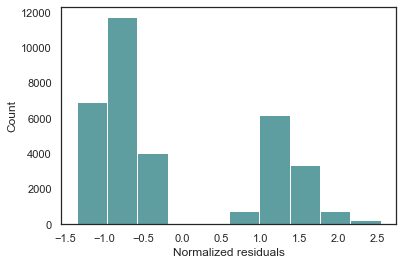

<IPython.core.display.Javascript object>

In [153]:
plt.hist(result3.resid_pearson, color="cadetblue")
plt.ylabel("Count")
plt.xlabel("Normalized residuals")

## Logistic Regression

C:\Users\Asus\.conda\envs\py37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy of logistic regression classifier on test set: 0.66523


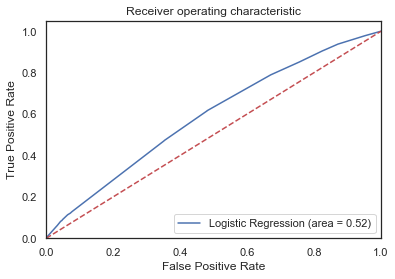

<IPython.core.display.Javascript object>

In [154]:
logreg = LogisticRegression()
logreg.fit(os_data_X, os_data_y.values.ravel())
y_pred = logreg.predict(os_test_X)
print("Accuracy score Logistic Regression:", logreg.score(os_test_X, os_test_y))
logit_roc_auc = roc_auc_score(os_test_y, logreg.predict(os_test_X))
fpr, tpr, thresholds = roc_curve(os_test_y, logreg.predict_proba(os_test_X)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.savefig("Log_ROC")
plt.show()

## KNN

In [155]:
knnclassifier = KNeighborsClassifier(n_neighbors=int(X.shape[1] / 2))
knnclassifier.fit(os_data_X, os_data_y.values.ravel())
prediction = knnclassifier.predict(os_test_X)
print("Accuracy Score: ", accuracy_score(os_test_y, prediction))

C:\Users\Asus\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy Score:  0.6642739950779327


<IPython.core.display.Javascript object>

## SVC

In [156]:
clf = SVC(gamma="auto", kernel="linear")
clf.fit(os_data_X, os_data_y.values.ravel())
pred = clf.predict(os_test_X)
print("Accuracy Score: ", accuracy_score(os_test_y, pred))

C:\Users\Asus\.conda\envs\py37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy Score:  0.6666666666666666


<IPython.core.display.Javascript object>

## Decision Tree Classifier

In [157]:
tree = DecisionTreeClassifier()
tree.fit(os_data_X, os_data_y.values.ravel())
pred = tree.predict(os_test_X)
print("Accuracy Score: ", accuracy_score(os_test_y, pred))

Accuracy Score:  0.6648892534864643


<IPython.core.display.Javascript object>

## Random Forest Classifier

In [162]:
# 1000 decision trees
rf = RandomForestClassifier(n_estimators=250, random_state=42)
rf.fit(os_data_X, os_data_y.values.ravel())
pred = rf.predict(os_test_X)
print("Accuracy Score: ", accuracy_score(os_test_y, pred))

C:\Users\Asus\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy Score:  0.7737900094901217


<IPython.core.display.Javascript object>

## Fitting the final model also with Imbalanced data for comparison

In [163]:
data_modelling4 = data_modelling2[
    [
        "default",
        "Average",
        "Very Good",
        "DTI 1: <15%",
        "CrHistory 2: >=20",
        "Purpose 1: Business",
    ]
]

X = data_modelling4.loc[:, data_modelling4.columns != "default"]
y = data_modelling4.loc[:, data_modelling4.columns == "default"]

os_train_X, os_test_X, os_train_y, os_test_y = train_test_split(
    X, y, test_size=0.3, random_state=0
)

result3 = logit_model.fit()
print(result3.summary2())

Optimization terminated successfully.
         Current function value: 0.631586
         Iterations 5
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.008     
Dependent Variable:  default           AIC:               42975.5068
Date:                2020-06-01 23:50  BIC:               43017.6795
No. Observations:    34014             Log-Likelihood:    -21483.   
Df Model:            4                 LL-Null:           -21650.   
Df Residuals:        34009             LLR p-value:       2.6427e-71
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      5.0000                                         
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
Average              0.3025   0.0398   7.6083 0.0000  0.2245  0.3804
Very Good           -0.7851 

<IPython.core.display.Javascript object>

In [169]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(os_train_X, os_train_y.values.ravel())
y_pred = logreg.predict(os_test_X)
print("Accuracy score Logistic Regression:", logreg.score(os_test_X, os_test_y))

# KNN
knnclassifier = KNeighborsClassifier(n_neighbors=5)
knnclassifier.fit(os_train_X, os_train_y.values.ravel())
prediction = knnclassifier.predict(os_test_X)
print("Accuracy Score KNN: ", accuracy_score(os_test_y, prediction))

# SVC
clf = SVC(gamma="auto", kernel="linear")
clf.fit(os_train_X, os_train_y.values.ravel())
pred = clf.predict(os_test_X)
print("Accuracy Score SVC: ", accuracy_score(os_test_y, pred))

# Decision tree
tree = DecisionTreeClassifier()
tree.fit(os_train_X, os_train_y.values.ravel())
pred = tree.predict(os_test_X)
print("Accuracy Score Decision Tree: ", accuracy_score(os_test_y, pred))

# Random Forest
rf = RandomForestClassifier(n_estimators=250, random_state=42)
rf.fit(os_train_X, os_train_y.values.ravel())
pred2 = rf.predict(os_test_X)
print("Accuracy Score Random Forest: ", accuracy_score(os_test_y, pred2))

Accuracy score Logistic Regression: 0.7896643947890605
Accuracy Score KNN:  0.6434302476059012
Accuracy Score SVC:  0.7896643947890605
Accuracy Score Decision Tree:  0.7896212578724873
Accuracy Score Random Forest:  0.7896212578724873


<IPython.core.display.Javascript object>